In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.gridspec as gridspec 
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

In [2]:
dictionary = pd.read_json("data/en_in_t_i0_und_x_history.json",typ = 'frame')
location_data = pd.read_json("data/Location History.json")

In [3]:
# Reading the json as a dict
with open('data/Location History.json') as json_data:
    location = json.load(json_data)
    
with open('data/en_in_t_i0_und_x_history.json') as json_data:
    dictionary = json.load(json_data)


In [4]:
df_location = pd.DataFrame.from_dict(location['locations'])
df_dictionary = pd.DataFrame.from_dict(dictionary['entry'])

In [5]:
def replaceEmpty(x):
    if x == ['']:
        return np.nan
    else:
        return x
def CleanText(x):
    return ' '.join(x)

In [6]:
df_dictionary.context = df_dictionary.context.apply(replaceEmpty)
df_dictionary.dropna(inplace=True)

In [7]:
df_dictionary['context'] = df_dictionary['context'].apply(CleanText)

In [8]:
import seaborn as sns
%matplotlib inline

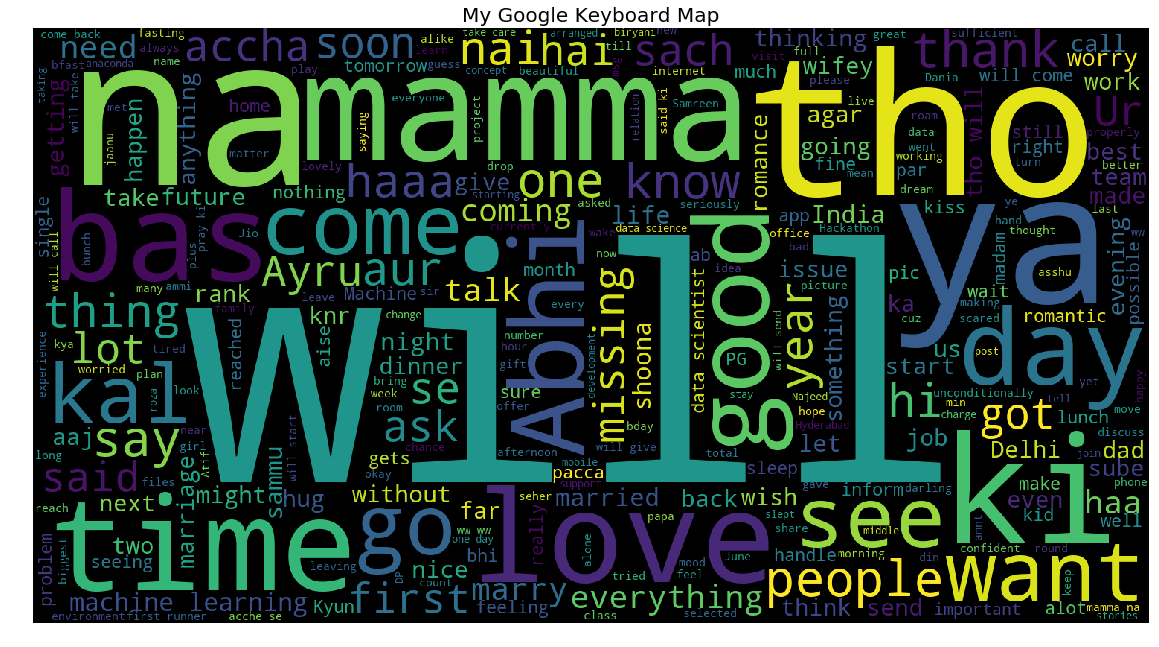

In [11]:
stopword=set(STOPWORDS)
text=df_dictionary.context.values
wc= WordCloud(background_color="black", max_words=300, stopwords=stopword, height=800, width=1500
             )
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("My Google Keyboard Map", fontsize=20)
plt.imshow(wc.recolor( random_state=17), alpha=1)
plt.show()